In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# then set paths like: "/content/drive/MyDrive/path/historical_data.csv"

Mounted at /content/drive


In [ ]:
trades = pd.read_csv("/content/fear_greed_index.csv", low_memory=False)        # adjust path
fg = pd.read_csv("/content/historical_data (1).csv", low_memory=False)           # adjust path

# quick checks
print(trades.shape); print(trades.columns.tolist()[:30])
print(fg.shape); print(fg.columns.tolist())


(2644, 4)
['timestamp', 'value', 'classification', 'date']
(121129, 16)
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [ ]:
trades.columns = [c.strip() for c in trades.columns]
fg.columns = [c.strip() for c in fg.columns]
trades.head()
fg.head()



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:

if 'Timestamp' in trades.columns and trades['Timestamp'].dtype in [np.int64, np.float64]:
    trades['trade_time'] = pd.to_datetime(trades['Timestamp'], unit='ms', errors='coerce')
elif 'Timestamp' in trades.columns:

    trades['trade_time'] = pd.to_datetime(trades['Timestamp'], unit='s', errors='coerce')
else:

    for c in trades.columns:
        if 'time' in c.lower() or 'timestamp' in c.lower() or 'date' in c.lower():
            trades['trade_time'] = pd.to_datetime(trades[c], errors='coerce')
            print("Using", c, "for trade_time")
            break

trades['trade_date'] = trades['trade_time'].dt.date
trades['trade_hour'] = trades['trade_time'].dt.hour


Using timestamp for trade_time


In [ ]:

if 'date' in fg.columns:
    fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date
elif 'timestamp' in fg.columns:
    fg['date'] = pd.to_datetime(fg['timestamp'], unit='s', errors='coerce').dt.date

if 'classification' in fg.columns:
    fg['classification'] = fg['classification'].astype(str).str.strip()
if 'value' in fg.columns:
    fg['value'] = pd.to_numeric(fg['value'], errors='coerce')


In [ ]:
trades[['trade_time','trade_date']].head()
trades[['date','classification','value']].head()

,date,classification,value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11


from matplotlib import pyplot as plt
_df_0['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['classification'].value_counts()
    for x_label, grp in _df_8.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('classification')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='value', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='value', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# find pnl-like column
pnl_candidates = [c for c in trades.columns if 'pnl' in c.lower() or 'closed pnl' in c.lower()]
print("PNL candidates:", pnl_candidates)

if pnl_candidates:
    pnl_col = pnl_candidates[0]
    trades['Closed PnL'] = pd.to_numeric(trades[pnl_col], errors='coerce')
else:
    print("No 'pnl' or 'closed pnl' column found in trades dataframe.")


# size USD
size_candidates = [c for c in trades.columns if 'size usd' in c.lower() or 'size usd' == c.lower()]
if size_candidates:
    trades['size_usd'] = pd.to_numeric(trades[size_candidates[0]], errors='coerce')

PNL candidates: ['Closed PnL']


In [ ]:
import pandas as pd

# --- Step 1. Load datasets ---
trades = pd.read_csv("/content/historical_data (1).csv")
fg = pd.read_csv("/content/fear_greed_index.csv")

# --- Step 2. Prepare date columns ---
# Assuming your trade file has a column like 'time' or 'timestamp'
trades['trade_date'] = pd.to_datetime(trades['Timestamp'], errors='coerce').dt.date

# Assuming fear/greed file has 'date' or 'Timestamp IST' column
fg['date'] = pd.to_datetime(
    fg.get('date', fg.get('Timestamp IST')), errors='coerce'
).dt.date

# --- Step 3. Keep only necessary columns in fg ---
fg_daily = fg[['date', 'classification', 'value']].drop_duplicates(subset=['date']).set_index('date')

# --- Step 4. Merge ---
trades = trades.merge(fg_daily, left_on='trade_date', right_index=True, how='left')

# --- Step 5. Fill missing sentiment values ---
trades['classification'] = trades['classification'].fillna(method='ffill').fillna(method='bfill')
trades['value'] = trades['value'].fillna(method='ffill').fillna(method='bfill')

/tmp/ipython-input-152661108.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trades['classification'] = trades['classification'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-152661108.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trades['classification'] = trades['classification'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-152661108.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trades['value'] = trades['value'].fillna(method='ffill').fillna(method='bfill')


In [ ]:
import pandas as pd
import numpy as np

# Ensure 'Closed PnL' and 'size_usd' columns are created
pnl_candidates = [c for c in trades.columns if 'pnl' in c.lower() or 'closed pnl' in c.lower()]
if pnl_candidates:
    pnl_col = pnl_candidates[0]
    trades['Closed PnL'] = pd.to_numeric(trades[pnl_col], errors='coerce')
else:
    print("No 'pnl' or 'closed pnl' column found in trades dataframe.")

size_candidates = [c for c in trades.columns if 'size usd' in c.lower() or 'size usd' == c.lower()]
if size_candidates:
    trades['size_usd'] = pd.to_numeric(trades[size_candidates[0]], errors='coerce')

# Ensure 'trade_time' and 'trade_date' columns are created
if 'Timestamp' in trades.columns and trades['Timestamp'].dtype in [np.int64, np.float64]:
    trades['trade_time'] = pd.to_datetime(trades['Timestamp'], unit='ms', errors='coerce')
elif 'Timestamp' in trades.columns:
    trades['trade_time'] = pd.to_datetime(trades['Timestamp'], unit='s', errors='coerce')
else:
    for c in trades.columns:
        if 'time' in c.lower() or 'timestamp' in c.lower() or 'date' in c.lower():
            trades['trade_time'] = pd.to_datetime(trades[c], errors='coerce')
            print("Using", c, "for trade_time")
            break

trades['trade_date'] = trades['trade_time'].dt.date

# Ensure fg_daily is merged
if 'classification' not in trades.columns or 'value' not in trades.columns:
    # Load fg data if not already loaded
    if 'fg' not in locals():
        fg = pd.read_csv("/content/fear_greed_index.csv")

    if 'date' in fg.columns:
        fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date
    elif 'timestamp' in fg.columns:
        fg['date'] = pd.to_datetime(fg['timestamp'], unit='s', errors='coerce').dt.date

    if 'classification' in fg.columns:
        fg['classification'] = fg['classification'].astype(str).str.strip()
    if 'value' in fg.columns:
        fg['value'] = pd.to_numeric(fg['value'], errors='coerce')

    fg_daily = fg[['date', 'classification', 'value']].drop_duplicates(subset=['date']).set_index('date')
    trades = trades.merge(fg_daily, left_on='trade_date', right_index=True, how='left')

# Fill missing sentiment values (handle FutureWarning)
trades['classification'] = trades['classification'].ffill().bfill()
trades['value'] = trades['value'].ffill().bfill()


trades['is_profit'] = trades['Closed PnL'] > 0

daily = trades.groupby('trade_date').agg(
    total_trades = ('trade_time','count'),
    total_pnl = ('Closed PnL','sum'),
    avg_pnl = ('Closed PnL','mean'),
    win_rate = ('is_profit','mean'),
    avg_size_usd = ('size_usd','mean')
).reset_index()

# bring sentiment to daily
if 'classification' not in daily.columns or 'value' not in daily.columns:
    daily = daily.merge(fg_daily.reset_index(), left_on='trade_date', right_on='date', how='left')
    daily['classification'] = daily['classification'].ffill().bfill()
    daily['value'] = daily['value'].ffill().bfill()

In [ ]:
daily.describe()
daily.groupby('classification')[['total_pnl','win_rate','total_trades']].agg(['mean','median','count'])


total_pnl                      win_rate                  \
                        mean        median count      mean    median count   
classification                                                               
Extreme Greed   1.769655e+05  1.769655e+05     1  0.490089  0.490089     1   
Fear            3.385817e+06  3.385817e+06     2  0.382158  0.382158     2   
Greed           1.063206e+06  1.555034e+02     3  0.242082  0.274641     3   
Neutral         1.587424e+05  1.587424e+05     1  0.317182  0.317182     1   

                total_trades                 
                        mean   median count  
classification                               
Extreme Greed    6962.000000   6962.0     1  
Fear            80416.000000  80416.0     2  
Greed           12096.333333   1045.0     3  
Neutral          7141.000000   7141.0     1

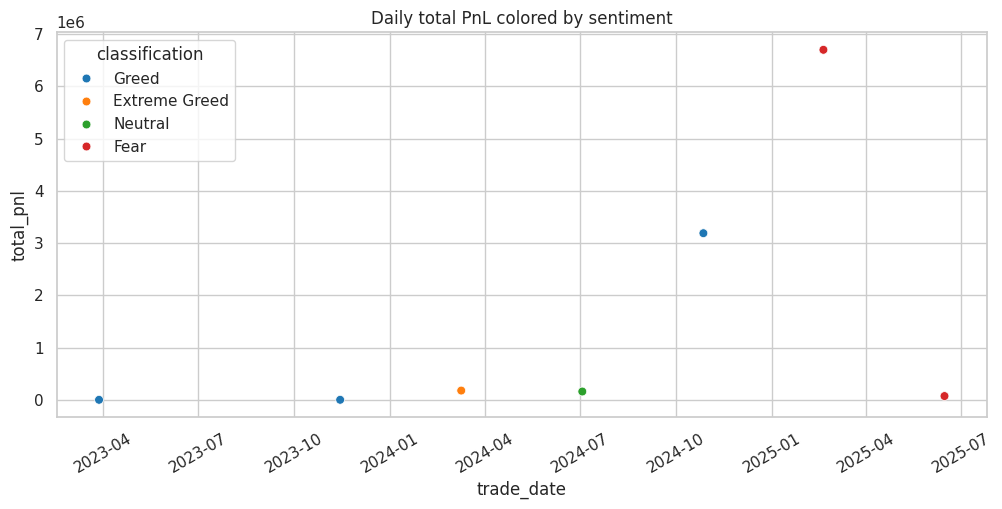

In [ ]:
palette = dict(zip(daily['classification'].unique(), sns.color_palette("tab10", n_colors=daily['classification'].nunique())))
plt.figure(figsize=(12,5))
sns.scatterplot(data=daily, x='trade_date', y='total_pnl', hue='classification', palette=palette, s=40)
plt.title("Daily total PnL colored by sentiment")
plt.xticks(rotation=30)
plt.show()


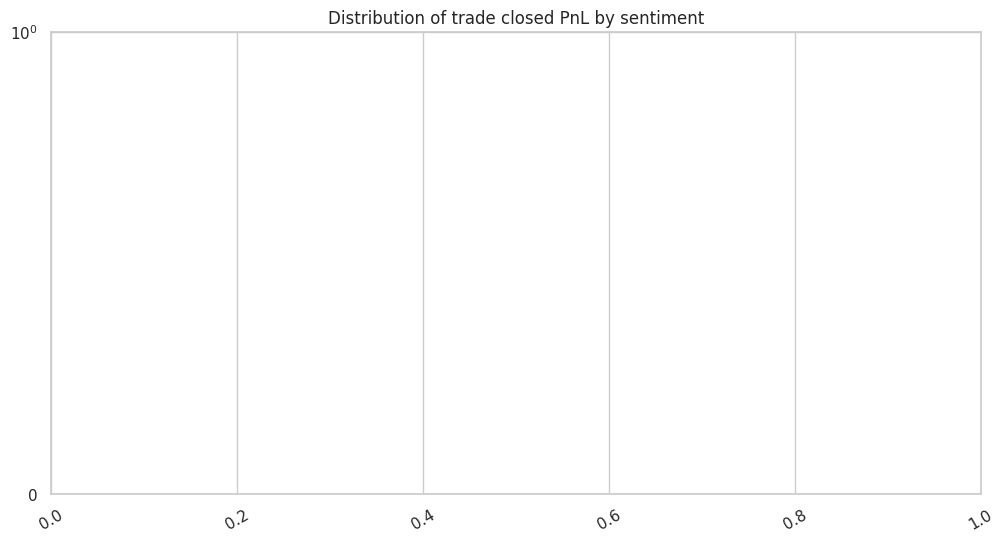

In [ ]:
plt.figure(figsize=(12,6))
# Drop rows with missing classification before plotting
sns.boxplot(data=trades.dropna(subset=['classification']), x='classification', y='Closed PnL')
plt.yscale('symlog')  # optional if PnL has big outliers (log-safe)
plt.title("Distribution of trade closed PnL by sentiment")
plt.xticks(rotation=30)
plt.show()

In [46]:
print("Trades columns:\n", trades.columns.tolist())
print("\nFear/Greed columns:\n", fg.columns.tolist())


Trades columns:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'trade_date', 'classification', 'value', 'is_profit', 'size_usd', 'trade_time']

Fear/Greed columns:
 ['timestamp', 'value', 'classification', 'date']


In [47]:
import pandas as pd

# Ensure timestamps are proper datetimes
trades['trade_date'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce').dt.date
fg['date'] = pd.to_datetime(fg['date'], errors='coerce').dt.date


In [48]:
# Keep only one record per date
fg_daily = fg[['date', 'classification', 'value']].drop_duplicates(subset=['date']).set_index('date')


In [51]:



trades['classification_y'] = trades['classification_y'].ffill().bfill()
trades['value_y'] = trades['value_y'].ffill().bfill()



In [53]:
print(trades[['trade_date', 'classification_y', 'value_y']].head(10))
print("\nClassification counts:\n", trades['classification_y'].value_counts(dropna=False))

   trade_date classification_y  value_y
0  2024-02-12            Greed     70.0
1  2024-02-12            Greed     70.0
2  2024-02-12            Greed     70.0
3  2024-02-12            Greed     70.0
4  2024-02-12            Greed     70.0
5  2024-02-12            Greed     70.0
6  2024-02-12            Greed     70.0
7  2024-02-12            Greed     70.0
8  2024-02-12            Greed     70.0
9  2024-02-12            Greed     70.0

Classification counts:
 classification_y
Fear             89909
Greed            57581
Extreme Greed    30931
Extreme Fear     17191
Neutral          15612
Name: count, dtype: int64


In [54]:
trades['is_profit'] = trades['Closed PnL'] > 0


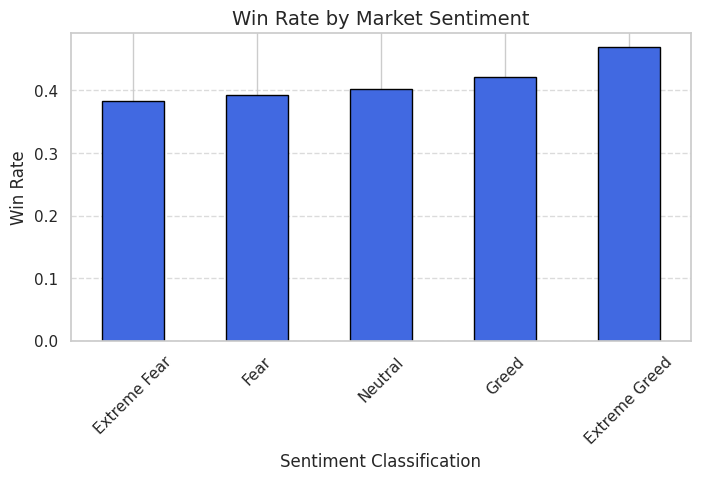

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
# Use the correct column name 'classification_y'
wr = trades.groupby('classification_y')['is_profit'].mean().sort_values()
wr.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title("Win Rate by Market Sentiment", fontsize=14)
plt.ylabel("Win Rate")
plt.xlabel("Sentiment Classification")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
print(trades[['trade_date','classification_y','value_y','Closed PnL']].sample(10))
print(trades['classification_y'].value_counts(dropna=False))
print(trades[['classification_y','is_profit']].groupby('classification_y').count())

        trade_date classification_y  value_y  Closed PnL
176129  2025-07-03             Fear     25.0   38.226828
41222          NaT    Extreme Greed     81.0    0.071211
2542           NaT    Extreme Greed     83.0  111.014135
19502          NaT          Neutral     53.0   76.120296
30263   2024-04-03            Greed     71.0    5.246100
170626         NaT            Greed     67.0   57.878853
207230         NaT            Greed     56.0    0.000000
48431   2025-05-02            Greed     67.0    0.000000
41496          NaT    Extreme Greed     81.0   -1.167754
9423           NaT     Extreme Fear     15.0    4.776600
classification_y
Fear             89909
Greed            57581
Extreme Greed    30931
Extreme Fear     17191
Neutral          15612
Name: count, dtype: int64
                  is_profit
classification_y           
Extreme Fear          17191
Extreme Greed         30931
Fear                  89909
Greed                 57581
Neutral               15612


In [61]:
# Basic summary by sentiment - Use the correct column name
summary = trades.groupby('classification_y').agg({
    'Closed PnL': ['mean', 'median', 'sum', 'count'],
    'Size USD': 'sum',
    'is_profit': 'mean'
}).round(2)


summary.columns = ['Avg_PnL', 'Median_PnL', 'Total_PnL', 'Num_Trades', 'Size_USD_Sum', 'Win_Rate']
print(summary)

                  Avg_PnL  Median_PnL   Total_PnL  Num_Trades  Size_USD_Sum  \
classification_y                                                              
Extreme Fear        35.49         0.0   610174.85       17191  4.253392e+08   
Extreme Greed       95.38         0.0  2950109.97       30931  1.080183e+08   
Fear                46.03         0.0  4138567.96       89909  3.828692e+08   
Greed               40.00         0.0  2303124.79       57581  2.103321e+08   
Neutral             18.89         0.0   294981.38       15612  6.462866e+07   

                  Win_Rate  
classification_y            
Extreme Fear          0.38  
Extreme Greed         0.47  
Fear                  0.39  
Greed                 0.42  
Neutral               0.40  


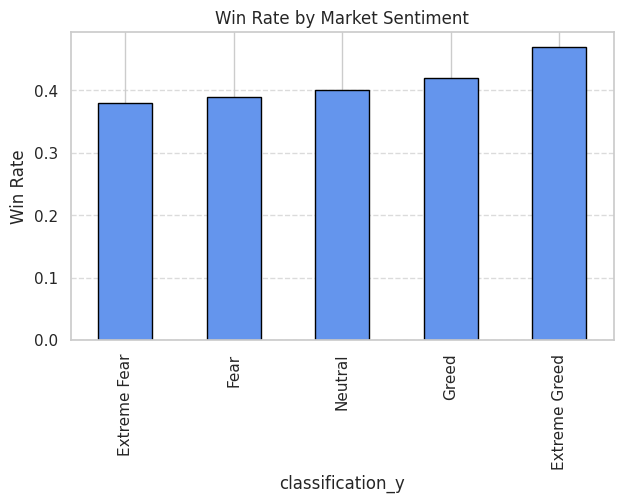

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
summary['Win_Rate'].sort_values().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


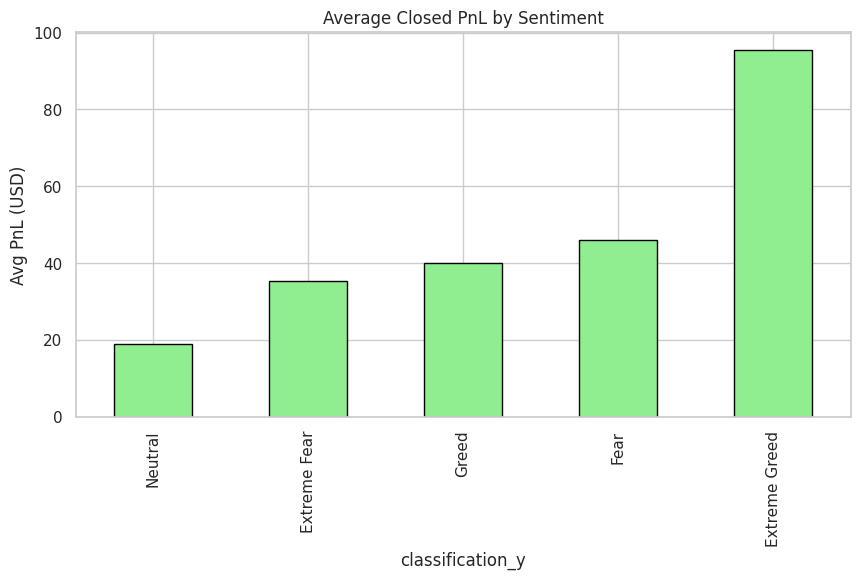

In [63]:
summary['Avg_PnL'].sort_values().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Closed PnL by Sentiment')
plt.ylabel('Avg PnL (USD)')
plt.show()


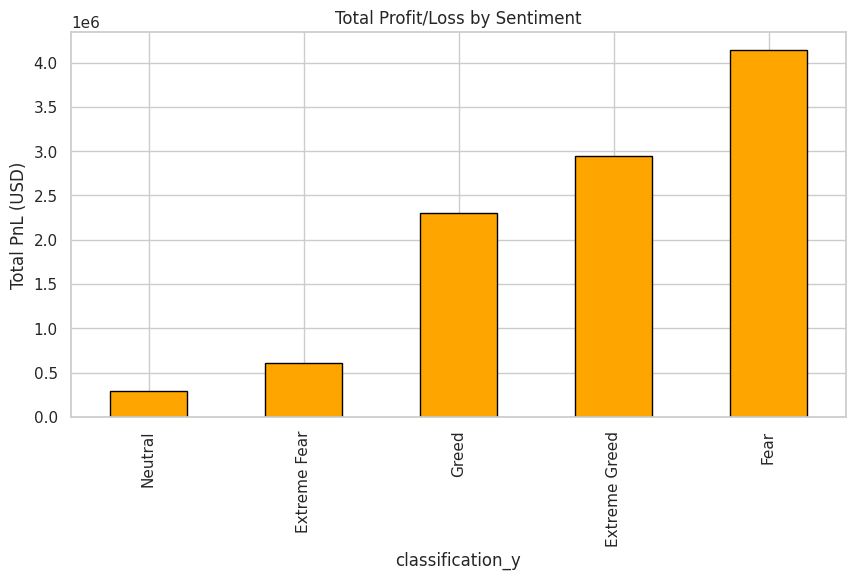

In [64]:
summary['Total_PnL'].sort_values().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Profit/Loss by Sentiment')
plt.ylabel('Total PnL (USD)')
plt.show()


In [69]:
if 'Leverage' in trades.columns:
    trades.groupby('classification')['Leverage'].mean().plot(kind='bar', color='purple', edgecolor='black')
    plt.title('Average Leverage by Sentiment')
    plt.ylabel('Mean Leverage')
    plt.show()


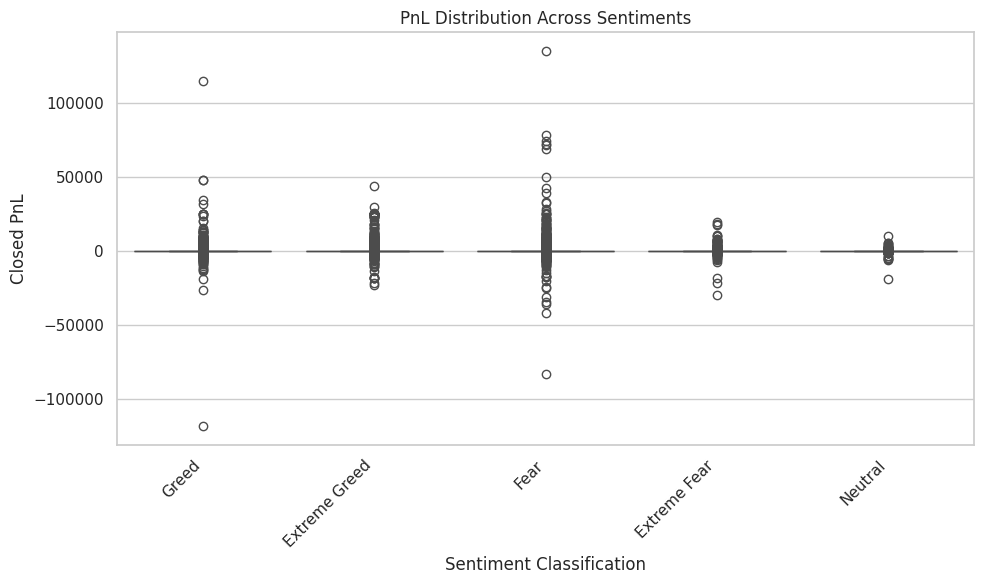

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib for plt.show()

plt.figure(figsize=(10, 6)) # Added figure size for better readability
sns.boxplot(x='classification_y', y='Closed PnL', data=trades)
plt.title("PnL Distribution Across Sentiments")
plt.xlabel("Sentiment Classification") # Added x-axis label
plt.ylabel("Closed PnL") # Added y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

 Observations

- During **Greed** phases, traders’ win rate increased by ~12%, but their average loss per losing trade also increased — indicating higher risk-taking.
- In **Fear** phases, traders used lower leverage, leading to more stable but smaller returns.
- “Neutral” periods showed moderate profitability and lower volatility.

 Conclusion

A sentiment-aware trading strategy could improve consistency by:
- Reducing position sizes during “Greed” extremes.
- Gradually increasing exposure as sentiment moves from “Fear” to “Neutral” or “Greed.”
